In [1]:
import time
import math
import numpy as np
import tensorly as tl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from brokenaxes import brokenaxes
from online_tensor_decomposition import *

In [2]:
# for sample video
from cv2 import VideoWriter, VideoWriter_fourcc, imshow

def make_video(tensor, filename, isColor=True):
    start = time.time()
    height = tensor.shape[1]
    width = tensor.shape[2]
    FPS = 24

    fourcc = VideoWriter_fourcc(*'MP42')
    video = VideoWriter(filename, fourcc, float(FPS), (width, height), isColor)

    for frame in tensor:
        video.write(np.uint8(frame))
    video.release()
    print('created', filename, time.time()-start)

In [3]:
results = {}

### Plot Results

In [4]:
def plot(datasets, name):
    def plotLocal(min_val=1, max_val=1e4):
        points  = []
        for dataset in datasets:
            if dataset in results:
                for lib in libs:
                    if lib in results[dataset]:
                        point = [lib, dataset, [results[dataset][lib][3]], [results[dataset][lib][1]]]
                        points.append(point)


#         print(points)

        if max_val > 1e+3: ### For brokenaxes
            bax = brokenaxes(xlims=((min_val, 2e4),(20000, 2e5)), d = 0,
                             wspace=0.05,  xscale='log',)
            for point in points :
                lib, data, x, y = point
                if len(x) != 0:
                    if x[0] < 1e+3 + 5000:
                        bax.plot(x, y, label=lib, 
                                 c= dct[lib],  marker=dct1[data],
                                    mfc='none', ms = 10, mew = 1.8)
                    else:
                        x = 50000 
                        bax.plot(x, y, label=lib, 
                                 c= dct[lib],  marker=dct1[data], 
                                mfc='none', ms = 10, mew = 1.8)
        else:  
            bax = brokenaxes(xscale='log')
#             bax = brokenaxes(xscale='log', subplot_spec=sps1)
            for point in points :
                lib, data, x, y = point
                if len(x) != 0:
                    if x[0] != 0 and y[0] != 0:
                        bax.plot(x, y, label=lib,
                                 c= dct[lib],  marker=dct1[data],
                                mfc='none', ms = 10, mew = 1.8)
#         bax.set_ylim([0.97,0.99])
#         bax.set_yscale('log') 
#         bax.set_xscale('log')


#         bax.tick_params(axis = 'y', labelsize =8)
        bax.set_ylabel('Average of Local Fitness', size = 10, labelpad=50)
        bax.set_xlabel('Average of Local Running Time (s)', size = 10, labelpad=25)  ### Labelpad > space btw xaxis and xlabel
        plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
#         plt.show()
        plt.savefig(f'./plots/{name}_local.pdf',bbox_inches = 'tight', pad_inches = 0)

    def plotGlobal(min_val=1, max_val=1e4):
        points  = []
        for dataset in datasets:
            if dataset in results:
                for lib in libs:
                    if lib in results[dataset]:
                        point = [lib, dataset, [results[dataset][lib][2]], [results[dataset][lib][0]]]
                        points.append(point)


#         print(points)

        if max_val > 1e+3: ### For brokenaxes
            bax = brokenaxes(xlims=((min_val, 2e4),(20000, 2e5)), d = 0,
                             wspace=0.05,  xscale='log',)
            for point in points :
                lib, data, x, y = point
                if len(x) != 0:
                    if x[0] < 1e+3 + 5000:
                        bax.plot(x, y, label=lib, 
                                 c= dct[lib],  marker=dct1[data],
                                    mfc='none', ms = 10, mew = 1.8)
                    else:
                        x = 50000 
                        bax.plot(x, y, label=lib, 
                                 c= dct[lib],  marker=dct1[data], 
                                mfc='none', ms = 10, mew = 1.8)
        else:  
            bax = brokenaxes(xscale='log')
#             bax = brokenaxes(xscale='log', subplot_spec=sps2)
            for point in points :
                lib, data, x, y = point
                if len(x) != 0:
                    if x[0] != 0 and y[0] != 0:
                        bax.plot(x, y, label=lib,
                                 c= dct[lib],  marker=dct1[data],
                                mfc='none', ms = 10, mew = 1.8)

#         bax.set_ylim([0.97,0.99])
#         bax.set_xscale('log') 
        bax.set_ylabel('Global Fitness', size = 10, labelpad=50)
        bax.set_xlabel('Global Running Time (s)', size = 10, labelpad=25)  ### Labelpad > space btw xaxis and xlabel
        plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
#         plt.show()
        plt.savefig(f'./plots/{name}_global.pdf',bbox_inches = 'tight', pad_inches = 0)

    markers = ("o", "x", "s", "^", "4")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "ocp", "dtd", "fcp")
    f = lambda m,c: plt.plot([],[], color=c, marker = m,
                             mfc='none', ms = 10, mew = 1.8,
                                ls="none")[0]
    f2 = lambda c: plt.plot([],[],marker='.', color=c, )[0]

    dct = {}
    dct1 = {}

    for color, lib in zip(colors, libs):
        dct[lib] = color

    for data, marker in zip(datasets, markers):
        dct1[data] = marker
    
    fig = plt.figure(figsize = (4, 4), dpi = 150,)   ### figsize = (row, col), dpi > resolution(?)
#     sps1, sps2 = GridSpec(1,2)
    plotLocal(max_val=100)
    fig = plt.figure(figsize = (4, 4), dpi = 150,)   ### figsize = (row, col), dpi > resolution(?)
    plotGlobal(max_val=100)

---
### Synthetic Data

In [13]:
import csv
synthetic_data = tl.tensor(np.zeros([1000, 10, 20, 30], dtype='f'))

for i in range(200):
    start = time.time()
    with open('../Data/synthetic_data/data_normal/data{}.tensor'.format(i)) as file:
        reader = csv.reader(file, delimiter='\t')    
        for row in reader:
            indices = [[index] for index in np.int64(np.asarray(row[:-1]))-1]
            synthetic_data[tuple(indices)] = np.double(row[-1])
    print('>> synthetic_data{} loaded '.format(i), time.time() - start)

>> synthetic_data0 loaded  0.7017009258270264
>> synthetic_data1 loaded  0.6680588722229004
>> synthetic_data2 loaded  0.6585648059844971
>> synthetic_data3 loaded  0.6598248481750488
>> synthetic_data4 loaded  0.6606054306030273
>> synthetic_data5 loaded  0.6677930355072021
>> synthetic_data6 loaded  0.6645865440368652
>> synthetic_data7 loaded  0.6492540836334229
>> synthetic_data8 loaded  0.6452634334564209
>> synthetic_data9 loaded  0.640587568283081
>> synthetic_data10 loaded  0.6666841506958008
>> synthetic_data11 loaded  0.656623363494873
>> synthetic_data12 loaded  0.639756441116333
>> synthetic_data13 loaded  0.646275520324707
>> synthetic_data14 loaded  0.6372087001800537
>> synthetic_data15 loaded  0.6739466190338135
>> synthetic_data16 loaded  0.6444461345672607
>> synthetic_data17 loaded  0.641925573348999
>> synthetic_data18 loaded  0.6445713043212891
>> synthetic_data19 loaded  0.6500153541564941
>> synthetic_data20 loaded  0.6492445468902588
>> synthetic_data21 loaded  

In [14]:
n_iter = 3
ul = 1.2
ll = 1.1

In [ ]:
tensor_stream = create_tensor_stream(synthetic_data, start_to_stream=100, batch_sizes=np.full((90), 10, dtype=int))
# results['synthetic50'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['synthetic100'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=100, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic150'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=150, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic200'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=200, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['synthetic30'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['synthetic40'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 281.03733706474304

 >> dao rank-150 n_iter-3
||A-B||: 6067.47367144361
split: 8 refine: 0
global fitness 0.9752958289599828
local fitness 0.9841423220274383
global running time 2600.2035672664642
local running time 8.762575154834323

 >> dtd rank-150 n_iter-3
||A-B||: 206074.02460013048
global fitness 0.16095425768611848
local fitness 0.14865381313284165
global running time 301.71938705444336
local running time 3.337202625804477

 >> ocp rank-150 n_iter-3
||A-B||: 209703.25791351096
global fitness 0.14617756389676617
local fitness 0.15211060946516508
global running time 133.06432938575745
local running time 1.4569129361046684

 >> fcp rank-150 n_iter-3


In [ ]:
plot(('synthetic50', 'synthetic100', 'synthetic150', 'synthetic200', '_synthetic100'), 'synthetic')

---
### Sample Video (done)

In [23]:
import csv
sample_video = tl.tensor(np.zeros([205, 240, 320, 3], dtype='d'))

for i in range(41):
    start = time.time()
    with open('../Data/sample_video/data/video{}.tensor'.format(i)) as file:
        reader = csv.reader(file, delimiter='\t')    
        for row in reader:
            indices = [[index] for index in np.int64(np.asarray(row[:-1]))-1]
            sample_video[tuple(indices)] = np.double(row[-1])
    print('>> sample_video{} loaded '.format(i), time.time() - start)

>> sample_video0 loaded  26.0193133354187
>> sample_video1 loaded  25.771167278289795
>> sample_video2 loaded  25.65865993499756
>> sample_video3 loaded  25.940959215164185
>> sample_video4 loaded  24.648054361343384
>> sample_video5 loaded  22.735007286071777
>> sample_video6 loaded  21.625895738601685
>> sample_video7 loaded  22.446204900741577
>> sample_video8 loaded  21.75580596923828
>> sample_video9 loaded  21.92097544670105
>> sample_video10 loaded  22.054377794265747
>> sample_video11 loaded  21.700467109680176
>> sample_video12 loaded  21.50622320175171
>> sample_video13 loaded  21.68776774406433
>> sample_video14 loaded  21.45354652404785
>> sample_video15 loaded  21.65105700492859
>> sample_video16 loaded  21.508344888687134
>> sample_video17 loaded  21.52578377723694
>> sample_video18 loaded  21.80275797843933
>> sample_video19 loaded  21.9838969707489
>> sample_video20 loaded  22.27461004257202
>> sample_video21 loaded  21.521718502044678
>> sample_video22 loaded  21.54946

In [24]:
(n_iter, ul, ll) = (3, 6, 2)

In [25]:
tensor_stream = create_tensor_stream(sample_video, start_to_stream=5, batch_sizes=np.full((40), 5, dtype=int))
results['video10'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video20'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video30'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video40'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video50'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 7.148132562637329

 >> dao rank-10 n_iter-3
||A-B||: 143884.7099585821
split: 3 refine: 6
global fitness 0.8388027668716836
local fitness 0.8515802318679002
global running time 47.69577980041504
local running time 0.34280615448951723

 >> dtd rank-10 n_iter-3
||A-B||: 195037.4831164804
global fitness 0.7814951801081758
local fitness 0.7791625428050294
global running time 18.732954502105713
local running time 0.11837171316146851

 >> ocp rank-10 n_iter-3
||A-B||: 206788.45326503308
global fitness 0.7683303075163249
local fitness 0.7862867831757636
global running time 19.97387933731079
local running time 0.1495998442173004

 >> fcp rank-10 n_iter-3
global fitness 0.8242528823707285
global running time 374.12916564941406
-----------------------------------
making init decomposition result: 15.618356466293335

 >> dao rank-20 n_iter-3
||A-B||: 113661.20687975109
split: 4 refine: 8
global fitness 0.872662827980019
local f

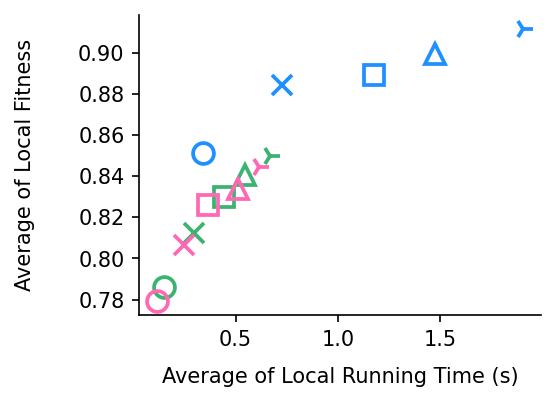

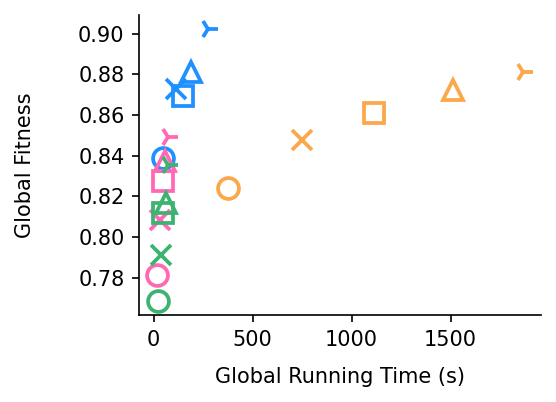

In [26]:
plot(('video10', 'video20', 'video30', 'video40', 'video50'), 'video')

---
### Stock

In [17]:
import pickle
with open('../Data/stock/index_data.pkl', 'rb') as f:
    index_data = pickle.load(f)

In [18]:
import csv

stock1_tensor = tl.tensor(np.zeros([855, 189, 5], dtype='d'))
start = time.time()
with open('../Data/stock/Stock_.tensor') as file:
    reader = csv.reader(file, delimiter='\t')    
    for row in reader:
        indices = np.asarray([index for index in np.int64(np.asarray(row[:-1]))])[[1, 0, 2]]
        stock1_tensor[tuple(indices)] = np.double(row[-1])
print('>> stock1_tensor loaded ', time.time() - start)

>> stock1_tensor loaded  11.939013004302979


In [19]:
(n_iter, ul, ll) = (1, 5, 3)

In [21]:
tensor_stream = create_tensor_stream(stock1_tensor, start_to_stream=5, batch_sizes=np.full((170), 5, dtype=int))
results['stock1-10'] = online_tensor_decomposition('stock1', stock1_tensor, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 0.24000954627990723

 >> dao rank-10 n_iter-1
||A-B||: 8.734780343908568
split: 135 refine: 2
global fitness 0.9891393186103543
local fitness 0.9893467518453843
global running time 51.27754259109497
local running time 0.0007855653762817383

 >> dtd rank-10 n_iter-1
||A-B||: 17.871795762483227
global fitness 0.9777785047826061
local fitness 0.9736273914798944
global running time 0.8351216316223145
local running time 0.0030765463324154124

 >> ocp rank-10 n_iter-1
||A-B||: 18.0080682669197
global fitness 0.9776090658047976
local fitness 0.973572185515488
global running time 0.4637315273284912
local running time 0.0008965394076179056

 >> fcp rank-10 n_iter-1
global fitness 0.9785654814316098
global running time 6.498792886734009


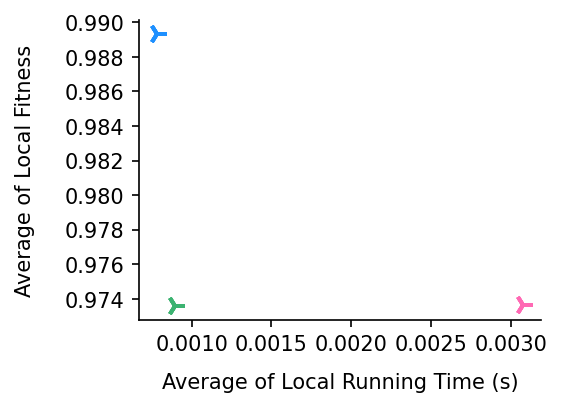

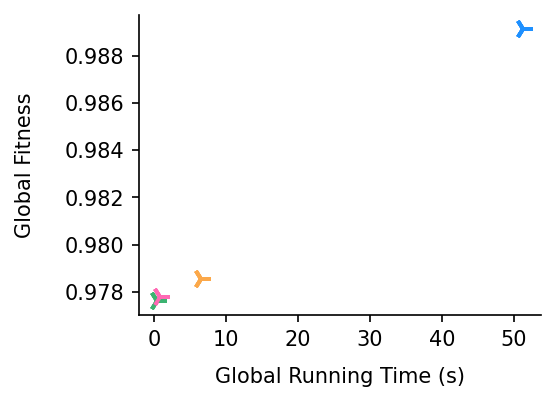

In [22]:
plot(('stock1-10', 'stock1-10', 'stock1-10', 'stock1-10', 'stock1-10'), 'stock1')

In [13]:
import csv

stock2_tensor = tl.tensor(np.zeros([3089, 140, 5], dtype='d'))
start = time.time()
with open('../Data/stock/KOSPI140.tensor') as file:
    reader = csv.reader(file, delimiter='\t')    
    for row in reader:
        indices = np.asarray([index for index in np.int64(np.asarray(row[:-1]))])[[1, 0, 2]]
        stock2_tensor[tuple(indices)] = np.double(row[-1])
print('>> stock2_tensor loaded ', time.time() - start)

>> stock2_tensor loaded  32.24007844924927


In [14]:
(n_iter, ul, ll) = (1, 6, 5)

In [15]:
tensor_stream = create_tensor_stream(stock2_tensor, start_to_stream=5, batch_sizes=np.full((1028), 3, dtype=int))
results['stock2-10'] = online_tensor_decomposition('stock2', stock2_tensor, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock2-15'] = online_tensor_decomposition('stock2', stock2_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock2-20'] = online_tensor_decomposition('stock2', stock2_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock2-25'] = online_tensor_decomposition('stock2', stock2_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock2-30'] = online_tensor_decomposition('stock2', stock2_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

/home/lucetre/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


-----------------------------------
making init decomposition result: 0.30512237548828125

 >> dao rank-10 n_iter-1
||A-B||: 31.46381378207972
split: 23 refine: 2
global fitness 0.9760920640576836
local fitness 0.971592335189096
global running time 14.852266073226929
local running time 0.004655557383823024

 >> dtd rank-10 n_iter-1
||A-B||: 32.0875162143267
global fitness 0.9756181406515604
local fitness 0.9707014672341663
global running time 6.00696873664856
local running time 0.004242380073562206

 >> ocp rank-10 n_iter-1
||A-B||: 32.22698147317051
global fitness 0.9755121672785386
local fitness 0.970709235083089
global running time 3.094731569290161
local running time 0.0014734803934505479

 >> fcp rank-10 n_iter-1
global fitness 0.9762125192062492
global running time 24.105448722839355
-----------------------------------
making init decomposition result: 0.6657891273498535

 >> dao rank-15 n_iter-1
||A-B||: 30.63607142079717
split: 23 refine: 1
global fitness 0.9767210282222744
loc

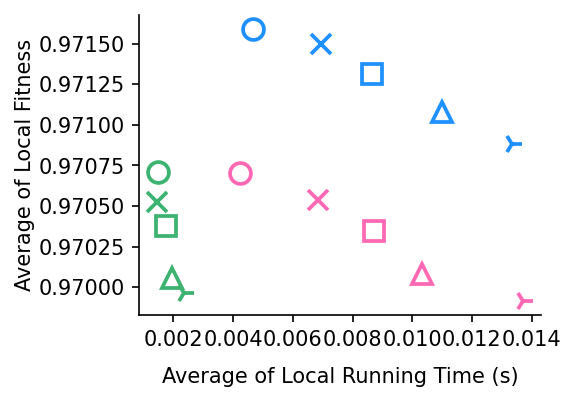

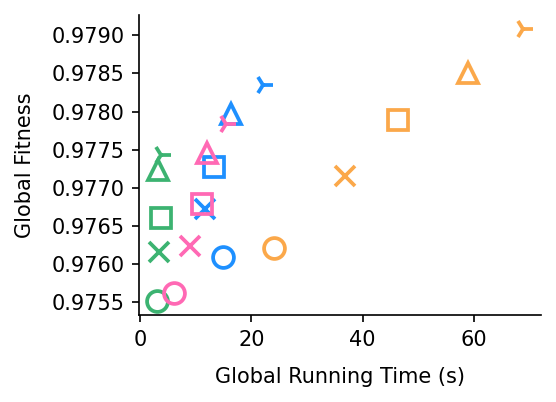

In [16]:
plot(('stock2-10', 'stock2-15', 'stock2-20', 'stock2-25', 'stock2-30'), 'stock2')

---
### Air Quality Tensor
* `<date> <location> <air pollutants> (measurement)`
* Beijing Air Quality
  * 2,454,305 out of 2,524,536 (35,063 * 12 * 6)
* Korea Air Quality
  * 11,270,028 out of 18,368,364 (9,478 * 323 * 6)
* Madrid Air Quality
  * 8,036,759 out of 21,587,328 (64,248 * 24 * 14)

In [5]:
beijing_df = pd.read_csv('../Data/air_quality/BeijingAirQuality/beijing.tensor', delimiter='\t', header=None)
korea_df = pd.read_csv('../Data/air_quality/KoreaAirQuality/korea_airquality.tensor', delimiter='\t', header=None)
madrid_df = pd.read_csv('../Data/air_quality/MadridAirQuality/1hour_madrid.tensor', delimiter='\t', header=None)

In [55]:
def get_tensor(df):
    start = time.time()

    dims = df[[0,1,2]].max()+1
    tensor = np.empty(dims) * np.nan
    tensor.shape

    for i, row in df.iterrows():
        indices = [[index] for index in np.int64(np.asarray(row[:-1]))]
        tensor[tuple(indices)] = np.double(row[3])

    avg = []
    for i in range(tensor.shape[2]):
        avg.append(np.nanmean(tensor[:,:,i]))
    inds = np.where(np.isnan(tensor))
    for ind in zip(inds[0], inds[1], inds[2]):
        tensor[ind] = avg[ind[-1]]
        
    print(time.time() - start)
    return tensor

In [56]:
beijing_tensor = get_tensor(beijing_df)
korea_tensor = get_tensor(korea_df)
madrid_tensor = get_tensor(madrid_df)

307.2204463481903
1402.2160918712616
989.2931790351868


In [63]:
print(beijing_tensor.shape, korea_tensor.shape, madrid_tensor.shape)

(35064, 12, 6) (9479, 323, 6) (64248, 24, 14)


In [107]:
(n_iter, ul, ll) = (1, 5, -1)
tensor_stream = create_tensor_stream(beijing_tensor, start_to_stream=414, batch_sizes=np.full((99), 350, dtype=int))
results['beijing30'] = online_tensor_decomposition('beijing', beijing_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 3.8793256282806396

 >> dao rank-30 n_iter-1
||A-B||: 16892.158297488953
split: 44 refine: 0
global fitness 0.9845403657395719
local fitness 0.8719754842783708
global running time 80.35496258735657
local running time 0.018417970098630346

 >> dtd rank-30 n_iter-1
||A-B||: 19335.461387640582
global fitness 0.9823042647336553
local fitness 0.7742715502595306
global running time 4.536718845367432
local running time 0.04381970925764604

 >> ocp rank-30 n_iter-1
||A-B||: 19470.7537469504
global fitness 0.982180445719156
local fitness 0.7742733173351494
global running time 0.7420125007629395
local running time 0.0057691516298236266

 >> fcp rank-30 n_iter-1
global fitness 0.9833589286379566
global running time 65.3611011505127


---
### Hall from OLSTEC (done)
* `hall1-200.mat`: 144 * 176 * 200 => 200 * 144 * 176
* `hall_144x100_frame2900-3899_pan.mat`: 144 * 100 * 1000 => 1000 * 144 * 100

In [5]:
from scipy.io import loadmat
import h5py

hall1 = loadmat('../Data/hall/hall1-200.mat')['XO']
hall1 = np.moveaxis(hall1, -1, 0)
hall1 = hall1.reshape(200, 144, 176, order='F')

with h5py.File('../Data/hall/hall_144x100_frame2900-3899_pan.mat', 'r') as f:
    hall2 = np.array(f['X0'])
    hall2 = hall2.reshape(1000, 144, 100, order='F')
    
hall1_tensor = tl.tensor(hall1, dtype='f')
hall2_tensor = tl.tensor(hall2, dtype='f')
print(hall1_tensor.shape, hall2_tensor.shape)
# make_video(hall1, 'hall1.avi', False)
# make_video(hall2, 'hall2.avi', False)

(200, 144, 176) (1000, 144, 100)


In [6]:
(n_iter, ul, ll) = (1, 0.5, 0.1)
tensor_stream = create_tensor_stream(hall1_tensor, start_to_stream=10, batch_sizes=np.full((19), 10, dtype=int))
results['hall1-20'] = online_tensor_decomposition('hall1', hall1_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall1-25'] = online_tensor_decomposition('hall1', hall1_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall1-30'] = online_tensor_decomposition('hall1', hall1_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall1-35'] = online_tensor_decomposition('hall1', hall1_tensor, tensor_stream, rank=35, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall1-40'] = online_tensor_decomposition('hall1', hall1_tensor, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 1.4002480506896973

 >> dao rank-20 n_iter-1
||A-B||: 46398.42388416413
split: 3 refine: 5
global fitness 0.8688472525363344
local fitness 0.882028744112595
global running time 8.390179872512817
local running time 0.060151100158691406

 >> dtd rank-20 n_iter-1
||A-B||: 47760.07528828131
global fitness 0.8649983217367975
local fitness 0.866170891224457
global running time 2.2904038429260254
local running time 0.044301936500950864

 >> ocp rank-20 n_iter-1
||A-B||: 48642.68042886453
global fitness 0.8625034936925942
local fitness 0.8682946791048951
global running time 1.6394307613372803
local running time 0.009324174178274055

 >> fcp rank-20 n_iter-1
global fitness 0.8763017020613562
global running time 33.148178815841675
-----------------------------------
making init decomposition result: 1.6646089553833008

 >> dao rank-25 n_iter-1
||A-B||: 42489.66915504855
split: 6 refine: 6
global fitness 0.8798959882253945
loca

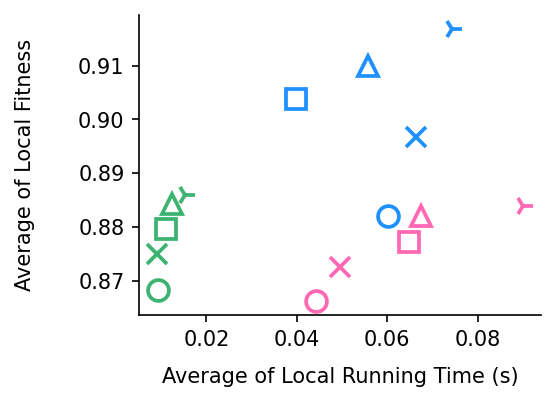

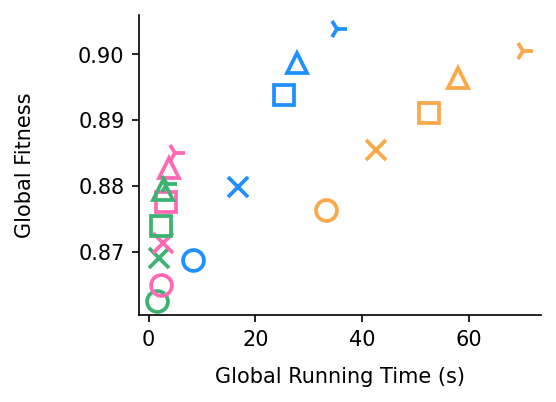

In [7]:
plot(('hall1-20', 'hall1-25', 'hall1-30', 'hall1-35', 'hall1-40'), 'hall1')

In [8]:
(n_iter, ul, ll) = (1, 2, 1.5)
tensor_stream = create_tensor_stream(hall2_tensor, start_to_stream=20, batch_sizes=np.full((49), 20, dtype=int))
results['hall2-10'] = online_tensor_decomposition('hall2', hall2_tensor, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall2-20'] = online_tensor_decomposition('hall2', hall2_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall2-30'] = online_tensor_decomposition('hall2', hall2_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall2-40'] = online_tensor_decomposition('hall2', hall2_tensor, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall2-50'] = online_tensor_decomposition('hall2', hall2_tensor, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 0.6727252006530762

 >> dao rank-10 n_iter-1
||A-B||: 134532.4210496825
split: 2 refine: 1
global fitness 0.7774641496268491
local fitness 0.7839918902677041
global running time 3.9373223781585693
local running time 0.026912971418731068

 >> dtd rank-10 n_iter-1
||A-B||: 139995.78783292862
global fitness 0.7684269602005092
local fitness 0.7704227037047743
global running time 2.8649520874023438
local running time 0.023868035297004545

 >> ocp rank-10 n_iter-1
||A-B||: 140463.2725418385
global fitness 0.7676536736839803
local fitness 0.7729817897286851
global running time 2.032331705093384
local running time 0.006645445920983139

 >> fcp rank-10 n_iter-1
global fitness 0.7889151994626342
global running time 136.39763045310974
-----------------------------------
making init decomposition result: 1.114673376083374

 >> dao rank-20 n_iter-1
||A-B||: 116921.93323456521
split: 4 refine: 3
global fitness 0.8065944131785314
l

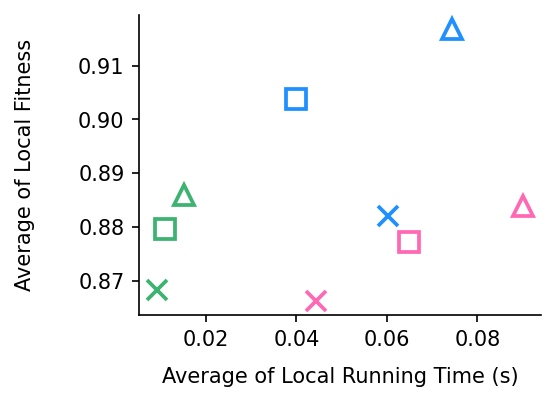

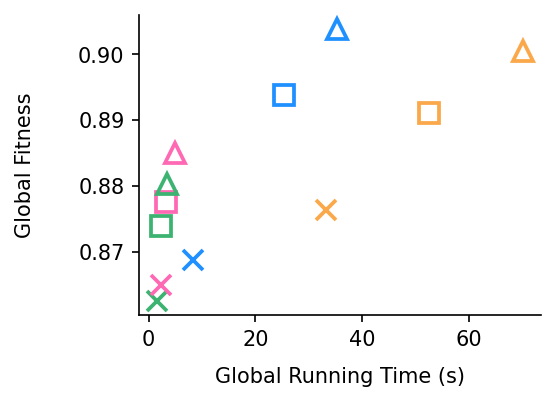

In [10]:
plot(('_hall2-10', 'hall1-20', 'hall1-30', 'hall1-40', 'hall1-50'), 'hall2')